# Preprocessing

## Load data

In [1]:
# load libraries

import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data

df_apps = pd.read_csv('../data/interim/int_applications.csv')
display(df_apps.head())

df_loans = pd.read_csv('../data/interim/int_loans.csv')
display(df_loans.head())

,app_id,profile_id,business_key,start_time,end_time,credit_term,credit_amount,know_source,loan_purpose,social_status,...,start_hour,duration,domain,email_prefix_length,email_prefix_digits,email_prefix_letters,email_prefix_symbols,domain_zone,exp_all_to_income,exp_loans_to_income
0,23542,14,2faadfd1-e453-48e2-9477-783088d0bcef,2018-07-22 10:36:48.200,2018-07-22 10:47:20.014,28,300.0,SEARCH,HEALTH,NONE,...,10,631,gmail.com,14,0,13,1,com,0.00,0.000
1,71871,14,beb8cb77-a8c7-4973-94cb-9e5ad79bda7a,2018-10-19 12:22:19.711,2018-10-19 12:34:19.849,28,300.0,BOARD,DEBT,NONE,...,12,720,gmail.com,14,0,13,1,com,0.00,0.000
2,243894,14,ad20cabe-f872-4454-b256-cc8478e41369,2019-02-13 17:59:46.609,2019-02-13 18:28:47.077,28,300.0,PRESS,CELEBRATION,NONE,...,17,1740,gmail.com,14,0,13,1,com,0.50,0.000
3,10421,30,51a8f418-0347-4fbf-b887-1167d812f0a9,2018-06-23 11:59:03.310,2018-06-23 12:13:46.713,5,300.0,SEARCH,SMALLP,NONE,...,11,883,crediton.ua,13,0,12,1,ua,0.25,0.125
4,65237,30,b6a46aec-dbef-4276-bad7-f34420a28fdf,2018-09-28 15:18:41.350,2018-09-28 15:31:15.718,7,300.0,SEARCH,SMALLP,NONE,...,15,754,crediton.ua,13,0,12,1,ua,NaN,NaN


,profile_id,app_id,loan,begin_date,end_date,amount,product,status,lodging_cnt,repayment_ratio,loan_num,can_be_bad,bad
0,709513,509688,21025,2019-06-14,2019-06-28,700.0,START_11,CLOSED,0,1.000,1,True,False
1,690248,518539,21232,2019-06-19,2019-06-30,2000.0,START_11,CLOSED,0,1.054,3,True,False
2,753344,755195,30938,2019-11-23,2019-12-07,700.0,START_11,CLOSED,0,1.036,17,True,False
3,416384,393817,17844,2019-04-09,2019-05-04,2300.0,START_11,CLOSED,1,1.180,2,True,False
4,767257,580393,23343,2019-07-31,2019-08-07,3000.0,START_11,CLOSED,0,1.108,2,True,False


In [3]:
# convert loans 'begin_date' and 'end_date' fields to datetime type
df_loans.loc[:,['begin_date', 'end_date']] = df_loans[['begin_date', 'end_date']].transform(pd.to_datetime)

In [4]:
# convert 'created_at' and 'updated_at' fields to datetime type
df_apps.loc[:,['start_time','end_time']] = df_apps[['start_time','end_time']].transform(pd.to_datetime, errors='coerce')

# Convert phone codes to string
df_apps['mphone_code'] = df_apps['mphone_code'].apply(lambda x: np.NaN if np.isnan(x) else '0'+str(x))
df_apps['emp_phone_code'] = df_apps['emp_phone_code'].apply(lambda x: np.NaN if np.isnan(x) else '0'+str(x))
df_apps['cp_phone_code'] = df_apps['cp_phone_code'].apply(lambda x: np.NaN if np.isnan(x) else '0'+str(x))

df_apps.head()

,app_id,profile_id,business_key,start_time,end_time,credit_term,credit_amount,know_source,loan_purpose,social_status,...,start_hour,duration,domain,email_prefix_length,email_prefix_digits,email_prefix_letters,email_prefix_symbols,domain_zone,exp_all_to_income,exp_loans_to_income
0,23542,14,2faadfd1-e453-48e2-9477-783088d0bcef,2018-07-22 10:36:48.200,2018-07-22 10:47:20.014,28,300.0,SEARCH,HEALTH,NONE,...,10,631,gmail.com,14,0,13,1,com,0.00,0.000
1,71871,14,beb8cb77-a8c7-4973-94cb-9e5ad79bda7a,2018-10-19 12:22:19.711,2018-10-19 12:34:19.849,28,300.0,BOARD,DEBT,NONE,...,12,720,gmail.com,14,0,13,1,com,0.00,0.000
2,243894,14,ad20cabe-f872-4454-b256-cc8478e41369,2019-02-13 17:59:46.609,2019-02-13 18:28:47.077,28,300.0,PRESS,CELEBRATION,NONE,...,17,1740,gmail.com,14,0,13,1,com,0.50,0.000
3,10421,30,51a8f418-0347-4fbf-b887-1167d812f0a9,2018-06-23 11:59:03.310,2018-06-23 12:13:46.713,5,300.0,SEARCH,SMALLP,NONE,...,11,883,crediton.ua,13,0,12,1,ua,0.25,0.125
4,65237,30,b6a46aec-dbef-4276-bad7-f34420a28fdf,2018-09-28 15:18:41.350,2018-09-28 15:31:15.718,7,300.0,SEARCH,SMALLP,NONE,...,15,754,crediton.ua,13,0,12,1,ua,NaN,NaN


In [5]:
# Merge loans and applications data
df_data = pd.merge(
    left=df_loans,
    right=df_apps,
    how='inner',
    on='app_id'
)


In [6]:
df_data.columns

Index(['profile_id_x', 'app_id', 'loan', 'begin_date', 'end_date', 'amount',
       'product', 'status', 'lodging_cnt', 'repayment_ratio', 'loan_num',
       'can_be_bad', 'bad', 'profile_id_y', 'business_key', 'start_time',
       'end_time', 'credit_term', 'credit_amount', 'know_source',
       'loan_purpose', 'social_status', 'family_status', 'children16',
       'education', 'faculty', 'gender', 'passport_type', 'reg_region',
       'reg_latitude', 'reg_longitude', 'reg_status', 'liv_equal',
       'liv_region', 'liv_latitude', 'liv_longitude', 'liv_status',
       'emp_region', 'emp_field', 'emp_position', 'exp_loans', 'exp_all',
       'income', 'income_period', 'income_source', 'cp_relation',
       'mphone_code', 'emp_phone_code', 'cp_phone_code', 'has_reg_pcode',
       'has_liv_pcode', 'has_emp_pcode', 'has_reg_flat', 'has_liv_flat',
       'has_emp_flat', 'has_emp_edrpou', 'has_promo_code', 'app_rank',
       'app_count', 'emp_region_equal', 'age', 'passport_age', 'reg_addr_

In [7]:
# drop useless columns
df_data.drop(
    ['profile_id_x', 'app_id', 'loan', 'loan_num', 'begin_date', 'end_date',
     'product', 'status', 'lodging_cnt', 'repayment_ratio','can_be_bad',
     'profile_id_y', 'business_key', 'end_time'], 
    axis='columns',
    inplace=True
)

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12507 entries, 0 to 12506
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   amount                12507 non-null  float64       
 1   bad                   12507 non-null  bool          
 2   start_time            12507 non-null  datetime64[ns]
 3   credit_term           12507 non-null  int64         
 4   credit_amount         12507 non-null  float64       
 5   know_source           12507 non-null  object        
 6   loan_purpose          12507 non-null  object        
 7   social_status         12507 non-null  object        
 8   family_status         12507 non-null  object        
 9   children16            12507 non-null  int64         
 10  education             12507 non-null  object        
 11  faculty               10134 non-null  object        
 12  gender                12507 non-null  object        
 13  passport_type   

## Fill missing values

In [9]:
# We can impute missing values by making another classification model to predict the missing value.

In [10]:
# faculty - fill with missing as it can be really missing due to field being not obligattory
df_data.loc[df_data['faculty'].isna(),'faculty'] = 'MISSING'

In [11]:
# latitude, longtitude - drop fields as for now. They need further elaboration
df_data.drop(['reg_latitude','reg_longitude','liv_latitude','liv_longitude'], axis='columns', inplace=True)

In [12]:
# emp_region, emp_field - fill with missing,
# as they can be really missing due to fields being not obligattory in some cases
df_data.loc[df_data['emp_region'].isna(),'emp_region'] = 'MISSING'
df_data.loc[df_data['emp_field'].isna(),'emp_field'] = 'MISSING'

In [13]:
# exp_loans - fill with 0 as it is when a client has no loans or refuses to give information
df_data.loc[df_data['exp_loans'].isna(),'exp_loans'] = 0

In [14]:
# emp_position fill with most common value (інше)
df_data.loc[df_data['emp_position'].isna(),'emp_position'] = 'інше'

In [15]:
# income_period fill with most common value (TWO_TPM)
df_data.loc[df_data['income_period'].isna(),'income_period'] = 'MISSING'

In [16]:
# cp_relation - fill with missing as it can be really missing due to field being not obligattory
df_data.loc[df_data['cp_relation'].isna(),'cp_relation'] = 'MISSING'

In [17]:
# emp_phone_code, cp_phone_code - fill with missing,
# as they can be really missing due to fields being not obligattory in some cases
df_data.loc[df_data['emp_phone_code'].isna(),'emp_phone_code'] = 'MISSING'
df_data.loc[df_data['cp_phone_code'].isna(),'cp_phone_code'] = 'MISSING'

In [18]:
# days_to_income - fill with most common value (6)
df_data.loc[df_data['days_to_income'].isna(),'days_to_income'] = 6

In [19]:
# reg_addr_age, liv_addr_age - manual binning with MISSING BIN after outlier
print('\nAddress of registration\n')
print(df_data['reg_addr_age'].describe())
print('\nLiving address\n')
print(df_data['liv_addr_age'].describe())


Address of registration

count     9785.000000
mean      5244.145529
std       3373.833345
min        123.000000
25%       2446.000000
50%       4844.000000
75%       7527.000000
max      46723.000000
Name: reg_addr_age, dtype: float64

Living address

count    10473.000000
mean      4531.808651
std       3451.394078
min        123.000000
25%       1567.000000
50%       3698.000000
75%       7014.000000
max      46723.000000
Name: liv_addr_age, dtype: float64


In [20]:
# exp_all_to_income, exp_loans_to_income - fill with 0 as exp data equals to 0
df_data.loc[df_data['exp_all_to_income'].isna(),'exp_all_to_income'] = 0
df_data.loc[df_data['exp_loans_to_income'].isna(),'exp_loans_to_income'] = 0

In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12507 entries, 0 to 12506
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   amount                12507 non-null  float64       
 1   bad                   12507 non-null  bool          
 2   start_time            12507 non-null  datetime64[ns]
 3   credit_term           12507 non-null  int64         
 4   credit_amount         12507 non-null  float64       
 5   know_source           12507 non-null  object        
 6   loan_purpose          12507 non-null  object        
 7   social_status         12507 non-null  object        
 8   family_status         12507 non-null  object        
 9   children16            12507 non-null  int64         
 10  education             12507 non-null  object        
 11  faculty               12507 non-null  object        
 12  gender                12507 non-null  object        
 13  passport_type   

## Remove outliers

In [22]:
# 3-sigmas
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))
    


We need to split variables into two groups as the requre different approaches.

### Block 1 

- `children16` 
- `age`, 
- `passport_age`
- `email_prefix_length`
- `reg_addr_age`
- `liv_addr_age`
- `duration`
- `days_to_income`

Total number of outliers: 73
Percentage of outliers:   0.58%


,upper_bound,lower_bound,anomalies_count,anomalies_percentage
children16,6.998626,-5.836556,57.0,0.455745
age,24787.699197,-2283.723024,0.0,0.000000
passport_age,14970.097482,-7195.094044,7.0,0.055969
email_prefix_length,29.082981,-5.245930,0.0,0.000000
reg_addr_age,22113.312254,-11625.021197,3.0,0.023987
liv_addr_age,21788.779039,-12725.161737,4.0,0.031982
duration,99453.694939,-76869.159079,0.0,0.000000
days_to_income,2420.002483,-2381.079320,5.0,0.039978


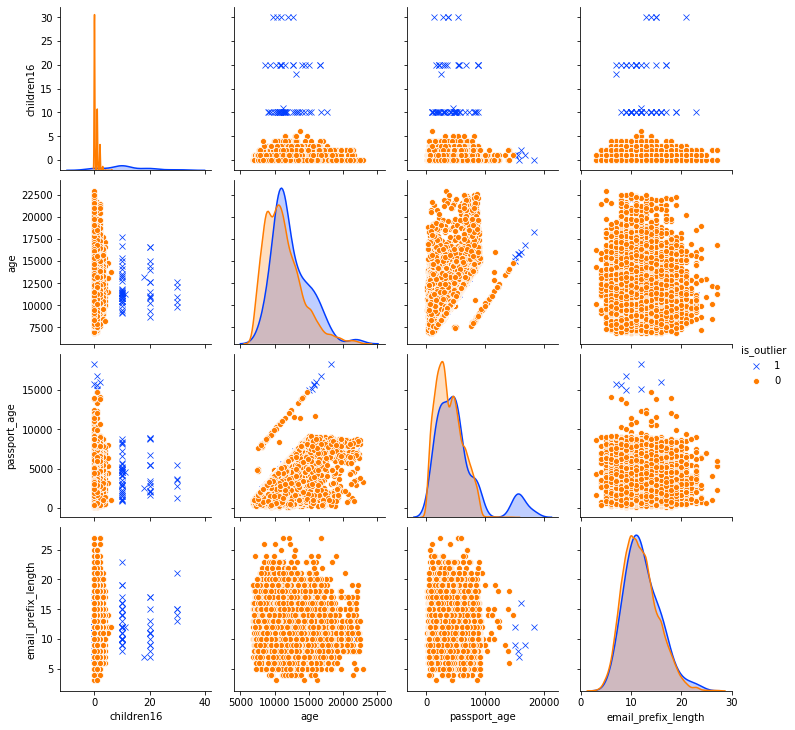

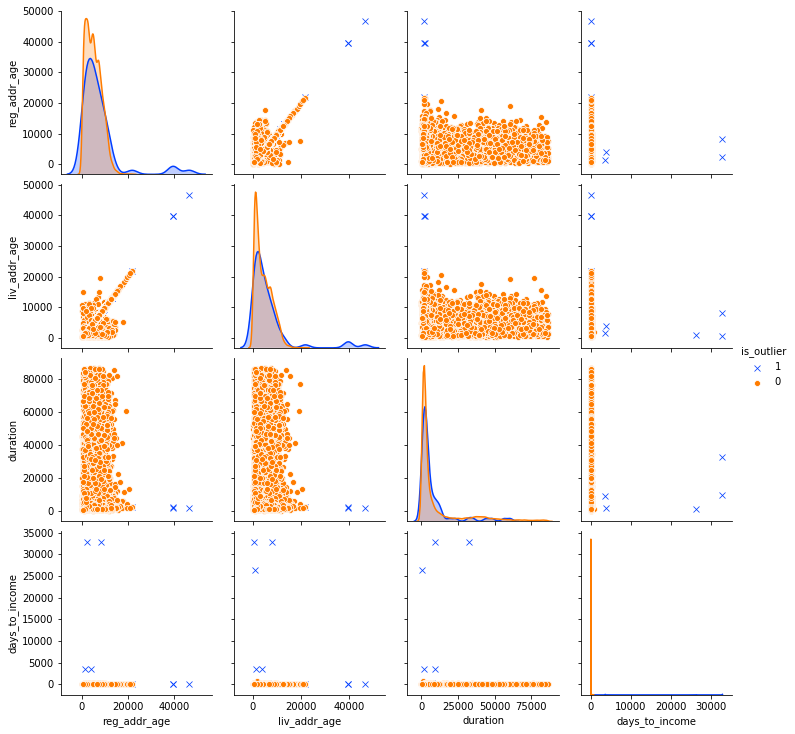

In [23]:
data_features = df_data.loc[:,['children16', 'age', 'passport_age', 'email_prefix_length',
                               'reg_addr_age','liv_addr_age', 'duration', 'days_to_income']]

comparison_table, std_outliers_1 = get_column_outliers(data_features, threshold=5)
anomalies_report(std_outliers_1)
display(comparison_table)

labeled_data = data_features.copy()
labeled_data['is_outlier'] = std_outliers_1

sns.pairplot(
    data=labeled_data, 
    vars = ['children16', 'age', 'passport_age', 'email_prefix_length'],
    hue='is_outlier', 
    hue_order=[1, 0],
    markers=['x', 'o'],  
    palette='bright'
)
plt.show()

sns.pairplot(
    data=labeled_data, 
    vars = ['reg_addr_age','liv_addr_age', 'duration', 'days_to_income'],
    hue='is_outlier', 
    hue_order=[1, 0],
    markers=['x', 'o'],  
    palette='bright'
)
plt.show()


### Block 2

- `exp_loans`
- `exp_all`
- `income`
- `exp_all_to_income`
- `exp_loans_to_income`

Total number of outliers: 77
Percentage of outliers:   0.62%


,upper_bound,lower_bound,anomalies_count,anomalies_percentage
exp_loans,30299.644171,-26533.705096,10.0,0.079955
exp_all,66659.890302,-54015.887264,18.0,0.143919
income,136165.706274,-107911.870662,19.0,0.151915
exp_all_to_income,4.945746,-3.958307,38.0,0.303830
exp_loans_to_income,2.066081,-1.791554,17.0,0.135924


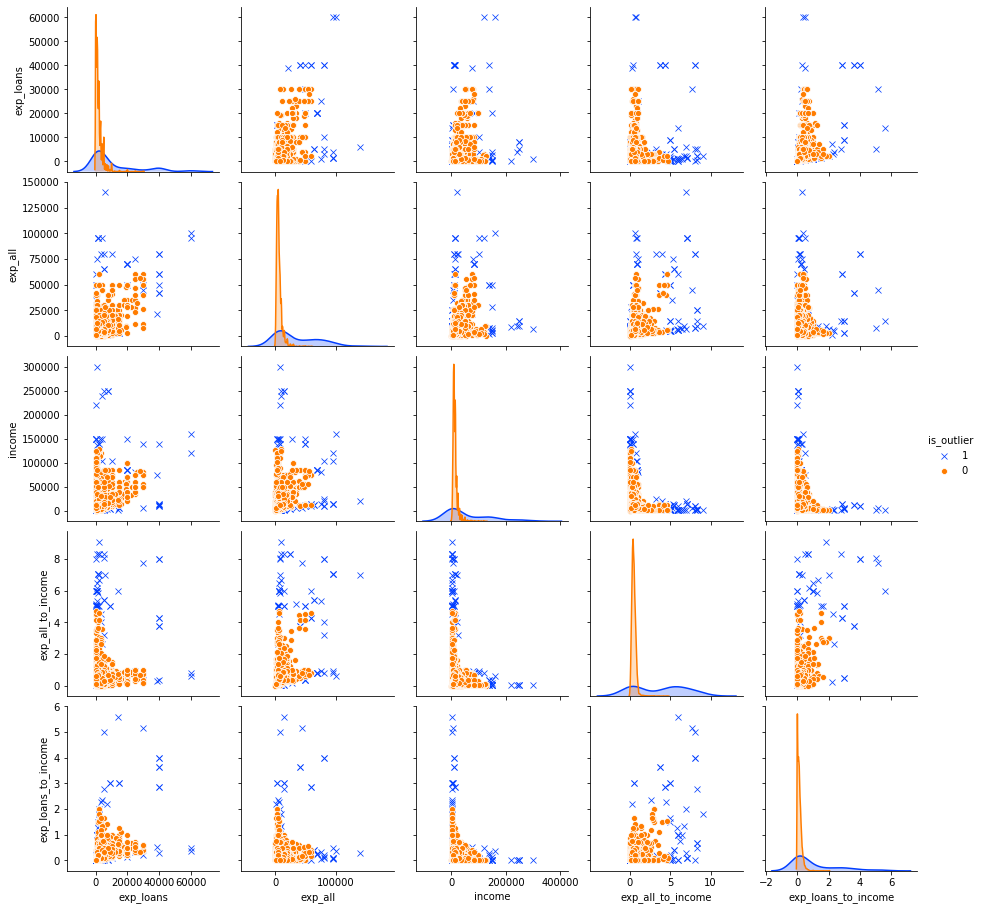

In [24]:
data_features = df_data.loc[:,['exp_loans', 'exp_all', 'income', 'exp_all_to_income','exp_loans_to_income']]

comparison_table, std_outliers_2 = get_column_outliers(data_features, threshold=10)
anomalies_report(std_outliers_2)
display(comparison_table)

labeled_data = data_features.copy()
labeled_data['is_outlier'] = std_outliers_2

sns.pairplot(
    data=labeled_data, 
    vars = ['exp_loans', 'exp_all', 'income', 'exp_all_to_income','exp_loans_to_income'],
    hue='is_outlier', 
    hue_order=[1, 0],
    markers=['x', 'o'],  
    palette='bright'
)
plt.show()

In [25]:
# Interquartile deviation
def outlier_iqr(data, col, threshold=3):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

### Block 1

!!! Omit `duration` cause it produces shitty results

Total number of outliers: 172
Percentage of outliers:   1.38%


,upper_bound,lower_bound,anomalies_count,anomalies_percentage
children16,4.0,-3.0,64.0,0.511713
age,23323.0,-1411.5,0.0,0.000000
passport_age,15240.0,-7727.0,5.0,0.039978
email_prefix_length,29.0,-6.0,0.0,0.000000
reg_addr_age,22770.0,-12797.0,3.0,0.023987
liv_addr_age,23355.0,-14774.0,3.0,0.023987
days_to_income,41.0,-22.0,101.0,0.807548


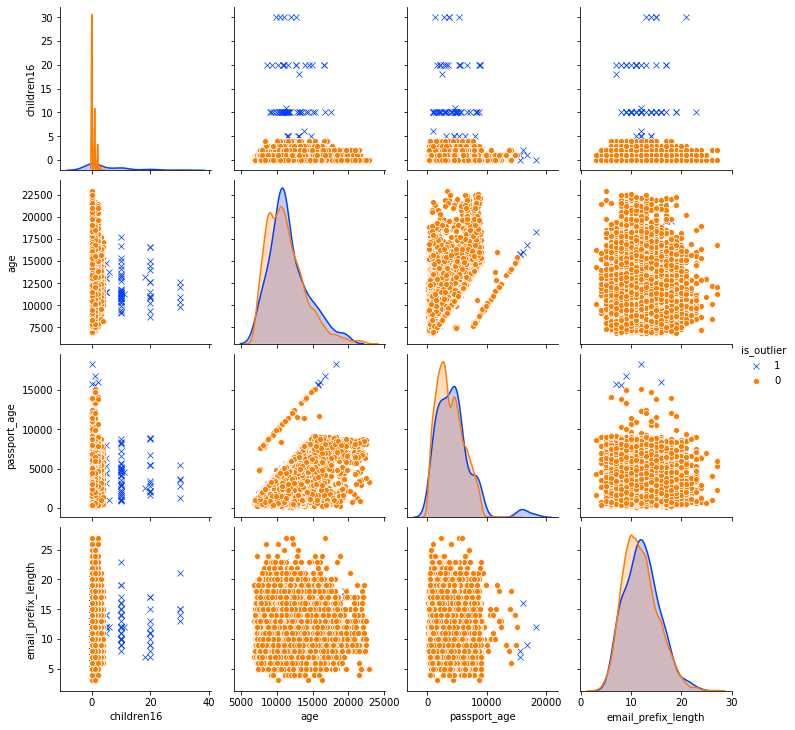

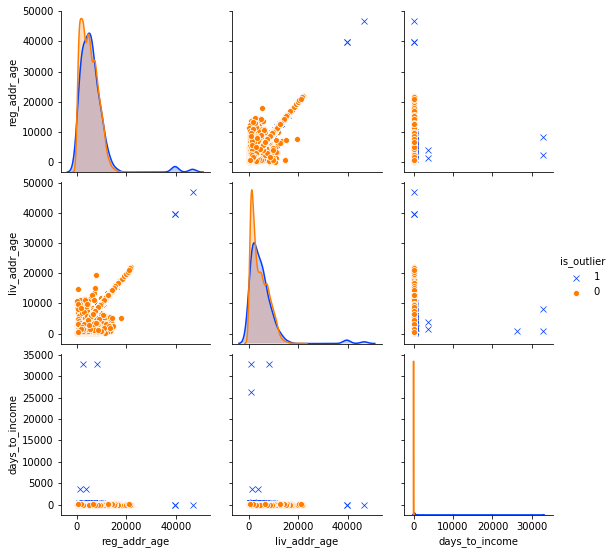

In [26]:
data_features = df_data.loc[:,['children16', 'age', 'passport_age', 'email_prefix_length',
                               'reg_addr_age','liv_addr_age', 'days_to_income']]

comparison_table, iqr_outliers_1 = get_column_outliers(data_features, function=outlier_iqr, threshold=3)
anomalies_report(iqr_outliers_1)
display(comparison_table)

labeled_data = data_features.copy()
labeled_data['is_outlier'] = iqr_outliers_1

sns.pairplot(
    data=labeled_data, 
    vars = ['children16', 'age', 'passport_age', 'email_prefix_length'],
    hue='is_outlier', 
    hue_order=[1, 0],
    markers=['x', 'o'],  
    palette='bright'
)
plt.show()

sns.pairplot(
    data=labeled_data, 
    vars = ['reg_addr_age','liv_addr_age', 'days_to_income'],
    hue='is_outlier', 
    hue_order=[1, 0],
    markers=['x', 'o'],  
    palette='bright'
)
plt.show()

### Block 2

Total number of outliers: 192
Percentage of outliers:   1.54%


,upper_bound,lower_bound,anomalies_count,anomalies_percentage
exp_loans,18500.00000,-16150.000000,80.0,0.639642
exp_all,55800.00000,-45000.000000,27.0,0.215879
income,80000.00000,-56500.000000,75.0,0.599664
exp_all_to_income,3.60000,-2.700000,54.0,0.431758
exp_loans_to_income,1.89697,-1.666667,20.0,0.159910


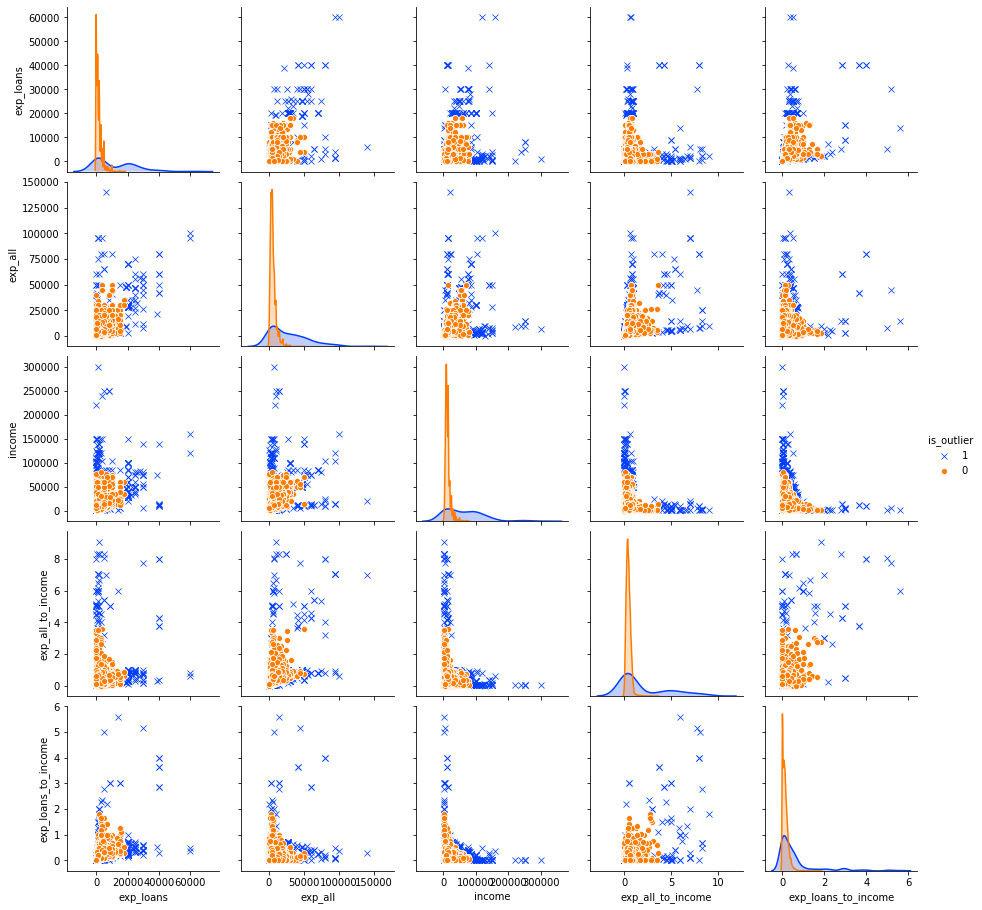

In [27]:
data_features = df_data.loc[:,['exp_loans', 'exp_all', 'income', 'exp_all_to_income','exp_loans_to_income']]

comparison_table, iqr_outliers_2 = get_column_outliers(data_features, function=outlier_iqr, threshold=10)
anomalies_report(iqr_outliers_2)
display(comparison_table)

labeled_data = data_features.copy()
labeled_data['is_outlier'] = iqr_outliers_2

sns.pairplot(
    data=labeled_data, 
    vars = ['exp_loans', 'exp_all', 'income', 'exp_all_to_income','exp_loans_to_income'],
    hue='is_outlier', 
    hue_order=[1, 0],
    markers=['x', 'o'],  
    palette='bright'
)
plt.show()

### Summary

In [28]:
# Посмотреть можно ли заменить значение outlier на какое-то другое значение чтобы не дропать всю запись.

In [29]:
outliers = np.concatenate((
    [std_outliers_1], 
    [std_outliers_2], 
    [iqr_outliers_1], 
    [iqr_outliers_2]
))

outliers = pd.DataFrame(
    outliers.T, 
    columns=['std_1', 'std_2', 'iqr_1', 'iqr_2']
)

outliers['score'] = outliers.mean(axis=1)

outliers.head()

,std_1,std_2,iqr_1,iqr_2,score
0,False,False,False,False,0.0
1,False,False,False,False,0.0
2,False,False,False,False,0.0
3,False,False,False,False,0.0
4,False,False,False,False,0.0


In [30]:
# drop outliers
df_data = df_data[outliers['score'] == 0]

In [31]:
# detect projects mentioned by data owners
projects = ((df_data['amount'] == 100) | (df_data['amount'] == 500)) & (df_data['amount'] < df_data['credit_amount'])
df_data = df_data[~ projects]

In [32]:
# drop loan amount
df_data.drop('amount', axis='columns', inplace=True)

In [33]:
# reg_addr_age, liv_addr_age - manual binning with MISSING BIN after outlier
df_data['reg_addr_age'] = pd.cut(df_data['reg_addr_age'], bins=5)
df_data['liv_addr_age'] = pd.cut(df_data['liv_addr_age'], bins=5)
df_data['reg_addr_age'] = df_data['reg_addr_age'].astype(str)
df_data['liv_addr_age'] = df_data['liv_addr_age'].astype(str)
df_data.loc[df_data['reg_addr_age'] == 'nan','reg_addr_age'] = 'MISSING'
df_data.loc[df_data['liv_addr_age'] == 'nan','liv_addr_age'] = 'MISSING'

## Convert categorical variables

In [34]:
# Encode as WoE
encoder = ce.WOEEncoder(regularization=0.1)

X = encoder.fit_transform(
    X=df_data.drop(['bad', 'start_time'], axis='columns'),
    y=df_data['bad']
)    

In [35]:
# Scale

X = StandardScaler().fit_transform(X)

In [36]:
df_processed = pd.DataFrame(X, columns=df_data.drop(['bad', 'start_time'], axis='columns').columns)

In [37]:
df_processed = pd.concat(
    [df_processed.reset_index(drop=True), df_data[['start_time', 'bad']].reset_index(drop=True)], 
    join='inner', 
    axis='columns'
)

In [38]:
df_processed.to_csv('../data/processed/data.csv', index=False)